# Tutorial 7: Financial Time Series Data

In this tutorial, we will look at financial time series - namely, the evolution of stock prices at the stock market. There is a naturally high interest in the analysis of this kind of data, and an even higher interest in predicting the evolution of these prices. If one correctly predicts the evolution of prices for several stocks, one can buy and sell at the right times and obtain 

In [1]:
!pip install matplotlib
!pip install qiskit
!pip install qiskit-finance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.8 MB/s eta 0:00:00
  Using cached fastdtw-0.3.4.tar.gz (133 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 22.4 MB/s eta 0:00:00m eta 0:00:010:0101


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.2/159.2 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 640.2/640.2 kB 15.1 MB/s eta 0:00:00 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 20.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 11.6 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-py3-none-any.whl size=3566 sha256=2932a5cdc07e97457a6c7962ed752378e1bc1eab606f1a0e4addf88999210889
  Stored in directory: /home/david/.cache/pip/wheels/1f/a1/63/bfd0fddb5bf0b59f564872e29272cee8a2de0cd745d88fede5
  Created wheel for docplex: filename=docplex-2.24.232-py3-none-any.whl size=682291 sha256=e365434f3cb64a15af8c5b53dfb90c494de15f7bc26e8708e564d2e16d5b765e
  Stored in directory: /home/david/.cache/pip/wheels/1c/d7/73/d979a358f33bc382783ca0443e0ec2df1a1cdae1eab6ff4c83
Successfully built fastdtw docplex


In [11]:
%matplotlib inline
from qiskit_finance import QiskitFinanceError
from qiskit_finance.data_providers import *
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# TODO: Let us first work with randomly generated fake stock market data
# generated for 2 stocks (tickers) between 01.01.2022 and 30.01.2022
data = RandomDataProvider(
    tickers=["one", "two"],
    start=datetime.datetime(2022, 1, 1),
    end=datetime.datetime(2022, 1, 30),
)

# TODO: find the function that loads the data into a RandomDataProvider,
data.run()

In [14]:
# TODO: 
# Use simple printing and then matplotlib to visualize
# the evolution of the underlying data inside the "data" RandomDataProvider


Means:
[98.23810813 53.32580434]
A time-series similarity measure:
[[1.00000000e+00 7.67779778e-04]
 [7.67779778e-04 1.00000000e+00]]
A covariance matrix:
[[ 2.79210145 -1.54723551]
 [-1.54723551  2.74697153]]


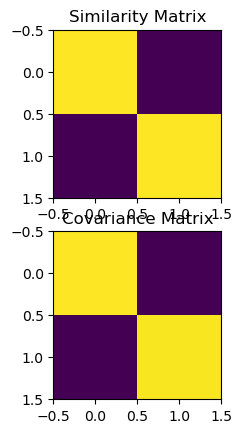

In [24]:
# TODO: Let's get some statistical metrics on the data
# Namely: the mean of each stock, the similarity matrix between the stocks
# And the covariance matrix
# Hint: no need to create new code for that, they are already defined for
# any qiskit-finance (Random)DataProvider

means = data.get_mean_vector()
print("Means:")
print(means)

rho = data.get_similarity_matrix()
print("A time-series similarity measure:")
print(rho)
# TODO : display the similarity matrix using matplotlib
fig = plt.figure()
ax = plt.subplot(211)
ax.set_title("Similarity Matrix")
ax.imshow(rho)

cov = data.get_covariance_matrix()
print("A covariance matrix:")
print(cov)
# TODO : display the covariance matrix using matplotlib
ax = plt.subplot(212)
ax.set_title("Covariance Matrix")
ax.imshow(cov)
plt.show()

In [27]:
stocks = ["GOOG", "AAPL", "MSFT", "TWTR"]

# TODO: To get this access token, go to
# https://data.nasdaq.com/sign-up
# and create a free student account

token = "xMMEe2yxywBAU15LyuUH"

try:
    wiki = WikipediaDataProvider(
        token=token,
        tickers=stocks,
        start=datetime.datetime(2018,1,1),
        end=datetime.datetime(2018,1,30)
        # To extract data between 01.01.2018 and 30.01.2018
    )
    # TODO : call the necessary function to actually load the data
    wiki.run()
except QiskitFinanceError as ex:
    print(ex)
    print("Error retrieving data.")

A time-series similarity measure:
[[1.00000000e+00 5.23846542e-05 4.81239133e-05 4.52619558e-05]
 [5.23846542e-05 1.00000000e+00 5.91670463e-04 3.32883940e-04]
 [4.81239133e-05 5.91670463e-04 1.00000000e+00 7.61081344e-04]
 [4.52619558e-05 3.32883940e-04 7.61081344e-04 1.00000000e+00]]
A covariance matrix:
[[ 1.16525208e+03 -1.95511505e+01  8.13459421e+01 -9.87304000e+00]
 [-1.95511505e+01  1.12885411e+01 -2.16174211e+00 -7.45595789e-01]
 [ 8.13459421e+01 -2.16174211e+00  5.92385132e+00 -4.47411842e-01]
 [-9.87304000e+00 -7.45595789e-01 -4.47411842e-01  8.31202895e-01]]


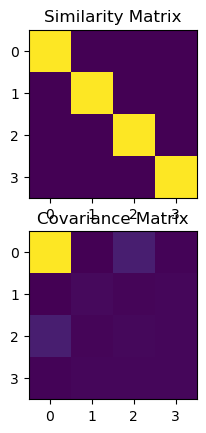

In [30]:
if wiki._data:
  # TODO: same exercise as above, compute the 
  # statistical metrics to get some insight on your data
  # and then display them using matplotlib

  rho = wiki.get_similarity_matrix()
  print("A time-series similarity measure:")
  print(rho)
  # TODO : display the similarity matrix using matplotlib
  fig = plt.figure()
  ax = plt.subplot(211)
  ax.set_title("Similarity Matrix")
  ax.imshow(rho)

  cov = wiki.get_covariance_matrix()
  print("A covariance matrix:") 
  print(cov)
  # TODO : display the covariance matrix using matplotlib
  ax = plt.subplot(212)
  ax.set_title("Covariance Matrix")
  ax.imshow(cov)
  plt.show()


else:
    print("Wiki data provider is empty.")

In [20]:
if wiki._data:
    print("The underlying evolution of stock prices:")
    # TODO: identically as before, plot the evolution
    # of the stocks in the wiki dataloader
else:
    print("No wiki data loaded.")

Homework: 

Could you use quantum to predict how these prices fluctuate?
If so, how?